# Week1: Simple Spam Mail Classifier

## 1. Introduction to NLP

Let's have a taste of NLP by exploring how ChatGPT, which is widely used these days, began the era of Large Language Models.

Using GPT2 to understand how ChatGPT works internally.

## 2. Spam Mail Classifier

Create a spam mail classifier based on what's learned in the lecture.

Building the model in the order presented in the lecture and observing the results.

#### a. Rule-Based Classifier without NLP

Create a classifier using a simple rule without NLP.

#### 0. Evaluation

Evaluate the results of the model created earlier.

#### b. Basic Word Processing!

Enhance the classifier using simple NLP techniques.

#### c. Word Preprocessing

Implementing how to preprocess words according to what's learned in the lecture, so that classification can be as accurate as possible without exceptions.

#### d. Similarity-Based Processing

Further improve the NLP-based model using similarity functions.

## 3. [Extra] Tokenization with BERT

Represent the tokenization from 2-c. as vectors using BERT.

#### Package Download

In [1]:
!pip install --quiet gdown pandas nltk fast-edit-distance

In [2]:
# nltk package init for lemmatization, stemming
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/devrok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/devrok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/devrok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1. Introduction to NLP

Natural Language Processing (NLP) stands at the forefront of modern artificial intelligence, enabling machines to understand, interpret, and generate human language. In this section, we embark on a journey to explore the fundamentals of NLP and its practical applications, with a focus on ChatGPT, one of the most widely used models in the field.

### Understanding the Significance of NLP

NLP has revolutionized various domains, including machine translation, sentiment analysis, question answering systems, and text summarization. Its applications range from enhancing search engines to enabling virtual assistants like Siri and Alexa to interact with users in natural language.

### ChatGPT: A Glimpse into the Era of Large Language Models (LLMs)

We delve into the evolution of NLP with the advent of Large Language Models (LLMs) like ChatGPT. These models, powered by vast amounts of data and advanced neural network architectures such as GPT-2 and GPT-3, have pushed the boundaries of natural language understanding and generation.

### Objectives of the Section

- Introduce the fundamental concepts of NLP.
- Highlight the transformative impact of NLP on various industries.
- Explore the role of ChatGPT in advancing NLP technology.
- Familiarize ourselves with the workings of GPT-2 as a precursor to ChatGPT.

### Key Topics Covered

- Overview of NLP: Basic concepts and applications.
- Evolution of Large Language Models: From GPT-2 to ChatGPT.
- Exploring GPT-2: Understanding its architecture and capabilities.

### Why It Matters

Understanding the basics of NLP and the underlying mechanisms of LLMs like ChatGPT is crucial for anyone venturing into the field of artificial intelligence, data science, or natural language understanding. This section sets the stage for the practical experimentation and model building exercises that follow, laying a solid foundation for further exploration into the exciting realm of NLP.


### Experimenting with GPT2

To gain insights into the workings of ChatGPT, we leverage GPT-2, a precursor to ChatGPT, to explore its internal mechanisms. By understanding how GPT-2 processes text and generates responses, we lay the groundwork for building our own NLP-based solutions in subsequent sections.


In [3]:
# model, tokenization init.
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("gpt2") # model과
tokenizer = AutoTokenizer.from_pretrained("gpt2") # tokenizer 다운

/home/devrok/.conda/envs/nlp_pt/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
prompt = "GPT2 is a model developed by OpenAI."

In [5]:
# string -> vector
input_ids = tokenizer(prompt, return_tensors="pt").input_ids # return_tensors="pt" : tokenizer를 pytorch로 변환
input_ids

tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
            13]])

In [6]:
# tokenizer 확인
tokenizer.decode(38), tokenizer.decode(11571), tokenizer.decode(17), tokenizer.decode(318)

('G', 'PT', '2', ' is')

In [7]:
# vector -> GPT2 -> vector
gen_tokens = model.generate(
    input_ids, # token화된 문장
    do_sample=True, # sampling을 이용하여 단어를 무작위로 선택
    temperature=0.9, # 1에 가까울수록 확률이 높은 단어 선택
    max_length=100,
)

gen_tokens
#[38, 11571, 17, 318, 257, 2746, 4166, 416, 4946, 20185, 13, .... ]을 보고 뒷부분을 생성

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


tensor([[   38, 11571,    17,   318,   257,  2746,  4166,   416,  4946, 20185,
            13,   383,  3061,   286,   428,  3348,   318,   284,  2423,   262,
          1459,  1181,   286,  3725,  5115, 17019,  7686,   290,   703,   484,
           460,   307,  5625,   284,   584,  4959,    13,   770,  3348, 12932,
           284,  2148,   257,   517,  9432,  6764,   286,   262,  4096, 10838,
           416,   543,   428,   318,  5625,   284, 17019,  7686,    13,   770,
          3164,   468,   587,  9713,   287,   428,  3348,   867,  1661,    13,
           383,  4031,   286,   428,  3348,   318,   284, 11589,  2209,   262,
          2276,  2428,  4376,   290,   284, 18077,   257,   517,  6496,  3164,
            13, 50256]])

In [8]:
# vector -> string
gen_text = tokenizer.batch_decode(gen_tokens)[0] # list 자료 형태 [0] 없어도 됨
gen_text # 그럴듯한 문장 생성

'GPT2 is a model developed by OpenAI. The goal of this paper is to review the current state of knowledge regarding neural networks and how they can be applied to other purposes. This paper seeks to provide a more objective description of the basic concepts by which this is applied to neural networks. This approach has been studied in this paper many times. The aim of this paper is to briefly address the general issues raised and to propose a more detailed approach.<|endoftext|>'

### Experimenting with ChatGPT

We conduct hands-on experiments with ChatGPT to gain practical insights into its capabilities and behavior. By interacting with ChatGPT and observing its responses, we deepen our understanding of its language processing abilities and explore its potential applications in various scenarios.

In [9]:
# 각각의 gpt가 답변한 내용들
gpt3_5 = "Close! It’s actually GPT-3, the third iteration of the Generative Pre-trained Transformer model, developed by OpenAI. GPT-2 is the predecessor to GPT-3."

gpt4 = """
Yes, that's correct!
GPT-2, or the second version of the Generative Pre-trained Transformer, is a model developed by OpenAI.
It's an advanced language processing AI model that uses a transformer-based machine learning technique to generate human-like text.
GPT-2 can comprehend and generate coherent and contextually relevant text based on a given prompt, making it useful for a variety of applications like text completion, summarization, and even generating creative writing.
"""

gpt4o = """
GPT-2 is a language model developed by OpenAI. It is part of a family of Generative Pre-trained Transformers (GPT) that use deep learning techniques to generate human-like text based on the input provided. Here are some key points about GPT-2:

Release Date: GPT-2 was introduced by OpenAI in February 2019.
Architecture: It uses a transformer architecture, which is a type of deep learning model designed for sequence-to-sequence tasks, such as translation and text generation.
Training Data: GPT-2 was trained on a diverse dataset of internet text. The dataset is large and varied, enabling the model to generate coherent and contextually relevant text across a wide range of topics.
Size Variants: GPT-2 comes in several size variants, with different numbers of parameters (the weights in the model):
117 million parameters
345 million parameters
762 million parameters
1.5 billion parameters (the largest version)
Capabilities: GPT-2 can perform a variety of natural language processing tasks, such as text completion, translation, summarization, and question answering, without needing task-specific training data.
Controversy and Concerns: Upon its release, there were concerns about the potential misuse of GPT-2, such as generating misleading news or spam. This led OpenAI to initially withhold the full model and release it gradually, starting with smaller versions and finally releasing the full model after thorough evaluation of its impact.
Successor: GPT-2 was succeeded by GPT-3, which is significantly larger and more powerful, with 175 billion parameters. GPT-3 further enhanced the capabilities demonstrated by GPT-2.
Overall, GPT-2 marked a significant advancement in the field of natural language processing and paved the way for subsequent developments in AI language models.
"""

## 2. Spam Mail Classifier

In this section, we focus on building a spam mail classifier using various techniques learned in the lecture. We follow a structured approach to develop and evaluate the classifier's performance, starting from simple rule-based methods to more sophisticated NLP-based models. Through this process, we aim to understand the effectiveness of different approaches in accurately identifying and classifying spam emails.

### Objectives:
- Develop a spam mail classifier based on lecture materials.
- Evaluate classifier performance using different techniques.
- Compare effectiveness of rule-based and NLP-based approaches.

### Key Steps:
1. **Rule-Based Classifier without NLP:** Implement a basic classifier using predefined rules.
2. **Basic Word Processing:** Enhance classifier using simple NLP techniques.
3. **Word Preprocessing:** Implement advanced word preprocessing methods for improved classification.
4. **Similarity-Based Processing:** Further refine classifier using similarity functions and NLP-based techniques.

### Evaluation:
- Assess classifier performance at each stage.
- Compare results to determine effectiveness of different approaches.
- Identify strengths and limitations of rule-based and NLP-based methods.

### Importance:
Developing a spam mail classifier provides practical insights into applying NLP techniques for text classification tasks. This section enables us to understand the challenges involved in spam detection and the role of NLP in addressing them, contributing to our overall understanding of natural language processing applications.

RAG(Real-time Abstractive Generation)는 최근 자연어 처리(NLP) 분야에서 사용되는 기술 중 하나입니다. 이 기술은 주어진 질문에 대해 실시간으로 관련된 정보를 검색하여 요약하고, 이를 바탕으로 응답을 생성하는 방식으로 동작합니다. RAG의 주요 구성 요소는 다음과 같습니다:

Retriever: 주어진 질문에 대한 관련 문서를 검색하는 역할을 합니다. 검색 엔진이나 데이터베이스에서 관련 정보를 찾아냅니다.
Generator: 검색된 문서를 바탕으로 응답을 생성하는 역할을 합니다. GPT-3와 같은 대규모 언어 모델을 사용하여 자연스럽고 일관성 있는 텍스트를 생성합니다.
이러한 RAG 모델은 특히 대화형 AI, 질문 응답 시스템, 챗봇 등에서 유용하게 사용될 수 있습니다. 예를 들어, 특정 주제에 대한 질문이 주어지면, 먼저 관련 정보를 검색하고, 그 정보를 요약하여 사용자에게 적절한 응답을 제공하는 방식입니다.

RAG는 기존의 단순한 정보 검색 모델보다 더 정교하고, 사용자가 원하는 정보를 더 정확하게 제공할 수 있다는 장점이 있습니다.

### Prepare Dataset

* Spam Mail Dataset
[Dataset Reference](https://www.kaggle.com/datasets/venky73/spam-mails-dataset?resource=download&SSORegistrationToken=CfDJ8B5GsGLMFaFLm6_4BsA80RS4BAT0LRVbH6iNxvo5aSOHX-1pg5QGq6ge5mtJU8nMIokHC1zedaT2IXaj98xFPqxsKGkKG4FktgUQIoWDCGIz6XGDNs5_0Y4gPevVU07z61T2d0z6mY1g98ljAzOE-DlkPT8k1zBPqyzX_d7yQJMR_49mt5pxs-_6WdFhdSu1B9pFDEnajFKk3QF791dEJp_4ok6NubwwwPyfQQ-O6yBAi9Z9VpkXVBtMIzXMO7_FeAidYdW5uSivFrnz2hmfv0yxmfq-GgNYXfPoAMvasqdAktgKRiFSI-GZATODMfnjFq1q40TDOQu7ZGg8b_9pwx40zhTxCNU9)

In [10]:
# download spam/ham dataset
import gdown
from pathlib import Path

url = 'https://drive.google.com/uc?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp'
dataset_path = Path('./spam_dataset.tsv')
gdown.download(url, str(dataset_path), quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Ua1q2hOfN25B6H8PDWXl4yViE_cNj3mp
To: /home/devrok/aiexpert/ai-nlp/04_NLP_Theory/spam_dataset.tsv
100%|██████████| 5.50M/5.50M [00:00<00:00, 16.3MB/s]


'spam_dataset.tsv'

### Dataset Inspection

In [11]:
import pandas as pd
df = pd.read_csv(dataset_path, sep="\t")

In [12]:
# check how data looks like
df # label_num -> 0 : ham, 1 : spam

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


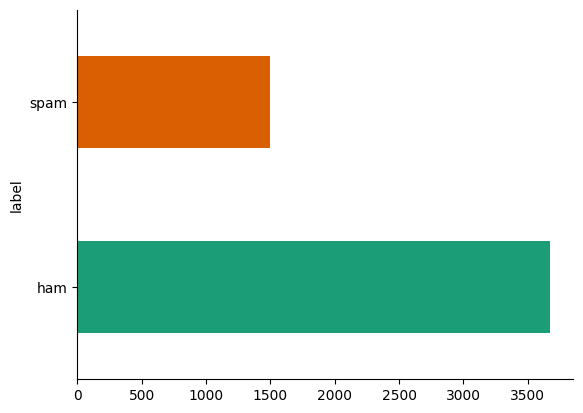

In [13]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
# check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


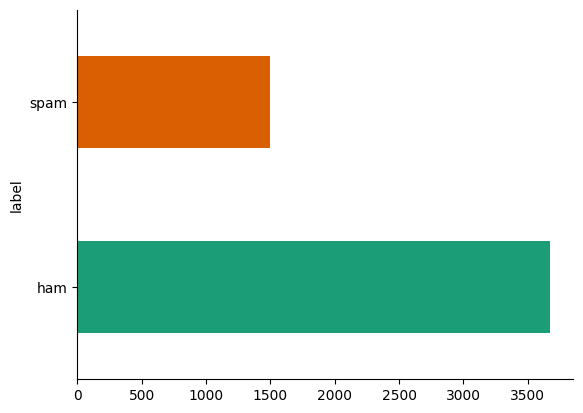

In [15]:
# distribution inspection
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# text_example
df.iloc[3]["text"]

'Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n'

### a. Rule-Based Classifier without NLP

In this subsection, we begin by implementing a basic spam mail classifier using a rule-based approach without relying on NLP techniques. We define simple rules or criteria based on known characteristics of spam emails, such as **length** of the email. By employing this straightforward method, we aim to establish a baseline for spam classification and evaluate its effectiveness in distinguishing between spam and ham emails.

### Objectives:
- Develop a rule-based classifier for spam mail detection.
- Define rules based on common characteristics of spam emails.

### Key Steps:
1. **Rule Definition:** Identify key features or patterns indicative of spam emails.
2. **Classifier Implementation:** Translate rules into algorithmic logic for classification.


### Importance:
Building a rule-based classifier provides a fundamental understanding of spam detection methods and serves as a benchmark for comparing more sophisticated approaches. This subsection lays the groundwork for exploring advanced NLP techniques in subsequent sections, contributing to our overall understanding of spam mail classification.


In [17]:
# rule definition
# 규칙기반으로 spam mail 분류
length_threshold = 750

df["model_without_nlp"] = df["text"].apply(lambda txt: 1 if len(txt) > length_threshold else 0) # 1 : sapm, 0 : not spam
# 특정 길이 이상은 spam으로 분류
df

,Unnamed: 0,label,text,label_num,model_without_nlp
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0


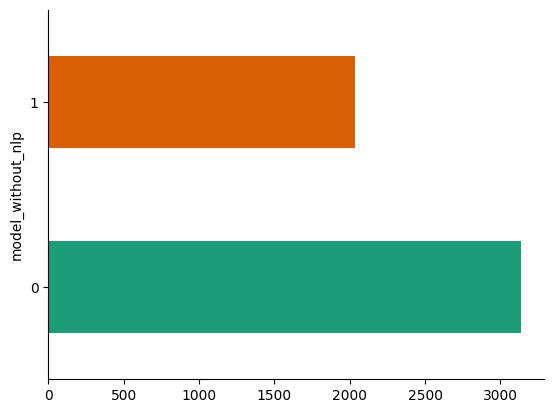

In [18]:
# distribution check
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('model_without_nlp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### b. Evaluation Metrics
Implement followings as function.

#### Precision
Precision quantifies the proportion of correctly classified spam emails out of all emails classified as spam. It is calculated as the ratio of true positives (correctly classified spam emails) to the sum of true positives and false positives (legitimate emails incorrectly classified as spam). Precision helps assess the classifier's ability to avoid misclassifying legitimate emails as spam.

#### Recall
Recall, also known as sensitivity, measures the proportion of correctly classified spam emails out of all actual spam emails. It is calculated as the ratio of true positives to the sum of true positives and false negatives (spam emails incorrectly classified as legitimate). Recall indicates the classifier's ability to identify all instances of spam.

#### F1 Score
The F1 score is the harmonic mean of precision and recall, providing a balanced evaluation metric that considers both false positives and false negatives. It is calculated as the weighted average of precision and recall, with a higher value indicating better overall performance. The F1 score is particularly useful when dealing with imbalanced datasets, where precision and recall may provide conflicting insights.

#### Importance:
Evaluating the classifier using multiple metrics, including F1 score, ensures a comprehensive understanding of its performance across different aspects of classification. By considering precision, recall, and their harmonic mean, we gain insights into the classifier's ability to accurately detect spam while minimizing false positives and false negatives.


In [19]:
# zip test
a1 = ["a", "b", "c"]
b1 = [1, 2, 3]

print(zip(a1,b1))
print(*zip(a1,b1))
# tuple쌍으로 만들어주는 iterator

('a', 1) ('b', 2) ('c', 3)


In [20]:
from typing import List

def confusion_matrix(reals: List[int], predicts: List[int]): #def confusion_matrix(arg1 name: arg1 type, ...):
  tp, fp, fn, tn = 0, 0, 0, 0
  for r_val, p_val in zip(reals, predicts):
    if r_val == 1:
      if p_val == 1:
        tp += 1
      else:
        fn += 1
    else:
      if p_val == 1:
        fp += 1
      else:
        tn += 1
  print(f"total: {tp + fp + fn + tn}")
  return tp, fp, fn, tn

# !!! be aware of zero-division !!!
def precision(tp, fp, fn, tn):
  return tp / (tp + fp) if (tp + fp) != 0 else 0

# !!! be aware of zero-division !!!
def recall(tp, fp, fn, tn):
  return tp / (tp + fn) if (tp + fn) != 0 else 0

# !!! be aware of zero-division !!!
def f1_score(tp, fp, fn, tn):
  p = precision(tp, fp, fn, tn)
  r = recall(tp, fp, fn, tn)
  return 2*p*r / (p + r) if (p + r) != 0 else 0

def print_metrics(tp, fp, fn, tn):
  p = precision(tp, fp, fn, tn)
  r = recall(tp, fp, fn, tn)
  f1 = f1_score(tp, fp, fn, tn)

  print(f"tp: {tp}, fp: {fp}, fn: {fn}, tn: {tn}")
  print(f"precision: {p}, recall: {r}, f1: {f1}")

In [21]:
# evaluation
real_labels = df["label_num"].tolist() # 정답 label
without_nlp_predicts = df["model_without_nlp"].tolist() # rule based로 예측된 label

print_metrics(*confusion_matrix(real_labels, without_nlp_predicts))

total: 5171
tp: 595, fp: 1442, fn: 904, tn: 2230
precision: 0.2920962199312715, recall: 0.39693128752501666, f1: 0.33653846153846156


In [22]:
confusion_matrix(real_labels, without_nlp_predicts)

total: 5171


(595, 1442, 904, 2230)

### c. Basic Word Processing

In this subsection, we enhance the spam mail classifier by incorporating basic natural language processing (NLP) techniques. By leveraging simple NLP methods, such as tokenization and stemming, we aim to improve the classifier's ability to understand and process textual data. This enhancement allows us to capture more nuanced features of spam emails and refine the classification process for better accuracy and effectiveness.

### Objectives:
- Apply basic NLP techniques to preprocess textual data.
- Enhance the classifier's ability to capture relevant features of spam emails.
- Improve classification accuracy and effectiveness compared to the rule-based approach.

### Key Steps:
1. **Keywords:** Check whether the keyword is in the mail. If the keyword is in the mail filter as spam and otherwise ham.
2. **Regex:** Use regex to catch the keywords.
3. **Edit Distance:**: Utilizing the edit distance to catch some words that is modified.
4. **NLTK**: Use NLTK to improve method 1-3.
  1. **Text Tokenization:** Break down email text into individual tokens or words to facilitate analysis and processing.
  2. **Stemming or Lemmatization:** Reduce words to their root form to standardize vocabulary and improve feature extraction.
  3. **Stopword Removal:** Eliminate common words (stopwords) that carry little semantic meaning to focus on informative content.

### Evaluation:
- Assess classifier performance using the same evaluation metrics as in Section 2-a (Accuracy, Precision, Recall, F1 Score).
- Compare results with the rule-based classifier to measure improvement in classification accuracy and effectiveness.

### Importance:
Incorporating basic NLP techniques enhances the classifier's ability to understand and process textual data, leading to more accurate spam classification. This subsection lays the foundation for exploring advanced NLP methods in subsequent sections, further improving the classifier's performance and contributing to our understanding of text classification tasks.


#### c-1. Keywords
Implement the following logic:
If keyword is in the mail, classify it as spam.

In [23]:
# Keyword Reference: https://lix-it.com/blog/spam-trigger-words/#:~:text=Some%20common%20spam%20trigger%20words,entice%20the%20recipient%20into%20taking
keywords = ['$', '$$$', 'affordable', 'amazing', 'apply', 'bargain', 'bonus', 'buy', 'buy', 'call', 'cards', 'cash', 'cash', 'certified', 'chance', 'cheap', 'clearance', 'click', 'compare', 'credit', 'deal', 'discount', 'fantastic', 'free', 'great', 'instant', 'lowest price', 'marketing solutions', 'no questions asked', 'open', 'order', 'prize', 'sale', 'sales', 'sample', 'satisfaction', 'save', 'sign up', 'solution', 'special ', 'subscribe', 'success', 'trial', 'unlimited', 'win', 'winner', 'act', 'brand', 'congratulations', 'consultation', 'expires', 'free', 'gift', 'guaranteed', 'lifetime', 'limited', 'membership', 'millions', 'new', 'obligation', 'offer', 'offer', 'only', 'order', 'pay', 'percent', 'price', 'promotion', 'rates', 'refund', 'sales', 'satisfaction', 'satisfied', 'supplies', 'trial', 'urgent', 'winner']
# spam mail에 들어있는 keyword
keywords = list(set(keywords)) # set 중복요소 제거
len(keywords)

68

In [24]:
keywords[:10]


['click',
 '$$$',
 'lifetime',
 'rates',
 'sales',
 'clearance',
 'certified',
 'obligation',
 'consultation',
 'sample']

In [25]:
# logic
def keyword_in_text(text):
  return 1 if any(keyword in text for keyword in keywords) else 0
  #for keyword in keywords:
  #  if keyword in text:
  #    return 1
  #return 0

df["model_rule_based"] = df["text"].apply(lambda txt: keyword_in_text(txt))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1


In [26]:
# membership 연산자 in
a = [1,2,3]
1 in a, 5 in a

(True, False)

In [27]:
# evaluation
rule_based_predicts = df["model_rule_based"].tolist()

print_metrics(*confusion_matrix(real_labels, rule_based_predicts))

total: 5171
tp: 1246, fp: 2722, fn: 253, tn: 950
precision: 0.31401209677419356, recall: 0.8312208138759173, f1: 0.4558258642765685


#### c-2. Regex



In [28]:
# example of regex
import re
# 대소문자 구분 : re.IGNORECASE
a = re.search("work\D+", "Subject: industrial worksheets", re.IGNORECASE)
a

<re.Match object; span=(20, 30), match='worksheets'>

In [29]:
# logic
def keyword_regex(text):
    return 1 if any(re.search(f"{keyword}\D+", text, re.IGNORECASE) for keyword in keywords) else 0
#  for keyword in keywords:
#    if re.search(f"{keyword}\D+", text, re.IGNORECASE):
#      return 1
#  return 0

df["model_regex"] = df["text"].apply(lambda txt: keyword_regex(txt))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1
...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1


In [30]:
# evaluation
regex_predicts = df["model_regex"].tolist()

print_metrics(*confusion_matrix(real_labels, regex_predicts))

total: 5171
tp: 1352, fp: 2719, fn: 147, tn: 953
precision: 0.3321051338737411, recall: 0.9019346230820547, f1: 0.4854578096947935


#### c-3. Edit Distance

In [31]:
# implementation of edit distance
# sentance간 distance 측정
def edit_distance(str1, str2, m, n):
    # Reference: https://www.geeksforgeeks.org/edit-distance-dp-5/
    # If first string is empty, the only option is to
    # insert all characters of second string into first
    if m == 0:
        return n

    # If second string is empty, the only option is to
    # remove all characters of first string
    if n == 0:
        return m

    # If last characters of two strings are same, nothing
    # much to do. Ignore last characters and get count for
    # remaining strings.
    if str1[m-1] == str2[n-1]:
        return edit_distance(str1, str2, m-1, n-1)

    # If last characters are not same, consider all three
    # operations on last character of first string, recursively
    # compute minimum cost for all three operations and take
    # minimum of three values.
    return 1 + min(
        edit_distance(str1, str2, m, n-1),    # Insert
        edit_distance(str1, str2, m-1, n),    # Remove
        edit_distance(str1, str2, m-1, n-1)    # Replace
    )

In [32]:
# edit distance example
str1 = "GEEXSFRGEEKKS"
#          P  I   R
str2 = "GEEKSFORGEEKS"
print(edit_distance(str1, str2, len(str1), len(str2)))
# 3부분의 차이가 발생

3


##### Logic for Edit Distance based Filter
1. Split the email into list of words
2. Measure edit distance between each word in email and each keyword.
3. Classify the email with similarity higher than threshold as spam.

In [33]:
# map -> func를 받아 iterator 처리
print(map(lambda x, y: x+y, [1,2,3], [3,7,9])) # iterator
print(*map(lambda x, y: x+y, [1,2,3], [3,7,9])) # unpack

4 9 12


In [34]:
df.loc[1, "text"].split()

['Subject:',
 'hpl',
 'nom',
 'for',
 'january',
 '9',
 ',',
 '2001',
 '(',
 'see',
 'attached',
 'file',
 ':',
 'hplnol',
 '09',
 '.',
 'xls',
 ')',
 '-',
 'hplnol',
 '09',
 '.',
 'xls']

In [35]:
# 각열의 text를 받아 split 후 lower
df["words"] = df["text"].apply(lambda txt: list(map(lambda w: w.lower(), txt.split())))
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject:, enron, methanol, ;, meter, #, :, 98..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject:, hpl, nom, for, january, 9, ,, 2001,..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject:, neon, retreat, ho, ho, ho, ,, we, '..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject:, photoshop, ,, windows, ,, office, ...."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject:, re, :, indian, springs, this, deal,..."
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject:, put, the, 10, on, the, ft, the, tra..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject:, 3, /, 4, /, 2000, and, following, n..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject:, calpine, daily, gas, nomination, >,..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject:, industrial, worksheets, for, august..."


#### Stopword Removal

In [36]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))
# 영어에서 큰 의미가 없는 word집합

from string import punctuation
PUNCTUATIONS = set(punctuation)
# 특수기호

print(len(STOPWORDS))
print(list(STOPWORDS)[:10])
print(list(PUNCTUATIONS)[:10])

179
['will', 'as', 'of', 'doesn', 'there', 'why', 'd', "aren't", 'our', 'so']
[':', '/', '?', '!', '{', '(', '>', '*', '+', '-']


In [37]:
"  hello,    world!.  fff.".strip("".join(["!", ".", ","]))

'  hello,    world!.  fff'

In [38]:
"".join(["!", ".", ","])

'!.,'

In [39]:
tokens = ['Hello', ',', 'world', '!', 'This', 'is', 'an', 'example', '.']
PUNCTUATIONS = {'He', '.', '!', '?'}

# PUNCTUATIONS에 포함된 문장 부호를 제거
tokens = [t for t in tokens if t not in PUNCTUATIONS]

print(tokens)  # ['Hello', 'world', 'This', 'is', 'an', 'example']

['Hello', ',', 'world', 'This', 'is', 'an', 'example']


In [40]:
"b" not in "abcd"

False

In [41]:
# logic
# 불용문자 제거
def regularize_tokens(tokens: List[str]):
    tokens = [t.strip() for t in tokens] # 문자열의 시작과 끝에서 공백 제거
    tokens = [t.strip("".join(PUNCTUATIONS)) for t in tokens] # 문자열의 시작과 끝에서 "".join(PUNCTUATIONS)에 해당하는 공백제거
    tokens = [t for t in tokens if len(t) > 1] # 문자열 길이가 2 이상인 문자만 저장
    tokens = [t for t in tokens if t not in STOPWORDS] # STOPWORDS가 아닌 경우만 저장
    tokens = [t for t in tokens if t not in PUNCTUATIONS] # PUNCTUATIONS가 아닌 경우만 저장
    tokens = [t for t in tokens if not re.match(r"^\d+?\.\d+?$", t)]  # e.g., 1.23 숫자 제거
    tokens = [t for t in tokens if not re.match(r"^\d+?\,\d+?$", t)]  # e.g., 1,234 숫자제거
    tokens = [t for t in tokens if not t.isnumeric()]  # e.g., 123 숫자제거
    return tokens

In [42]:
# logic
df["words"] = df["words"].apply(lambda ws: regularize_tokens(ws)) #불용어 제거
df

,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject:, nron, methanol, meter, follow, th, ..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject:, hpl, nom, january, attached, fil, h..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject:, neon, retreat, ho, ho, ho, around, ..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject:, photoshop, windows, offic, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject:, indian, springs, deal, book, th, te..."
...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject:, put, th, th, ft, th, transport, vol..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject:, following, noms, hpl, tak, th, xtra..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject:, calpin, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject:, industrial, worksheets, august, act..."


In [43]:
from fast_edit_distance import edit_distance as f_edit_distance # 단어간 distance를 계산하는 module
f_edit_distance("hello", "hsseello")

3

In [44]:
!pip install ipdb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [45]:
#chance
#subject:
f_edit_distance("chance", "subject:")

7

In [46]:
# logic
import random
#import ipdb
from fast_edit_distance import edit_distance as f_edit_distance

from tqdm import tqdm
tqdm.pandas(desc="Measuring edit distance")

def edit_distance_per_keyword(ws: List[str]):
  # return normalized total sum of edit distance of each word in ws.
  # normalization: consider the length of both keywords and ws.
  distance = 0
  # keywords = ['$', '$$$', 'affordable', 'amazing',,,,, 스팸이 포함하는 keyword
  #ipdb.set_trace()
  for keyword in keywords:
    for w in ws:
      distance += f_edit_distance(keyword, w)
  return distance / (len(keywords) * len(ws)) # distance의 평균


df["edit_distance"] = df["words"].progress_apply(lambda txts: edit_distance_per_keyword(txts))
df

Measuring edit distance: 100%|██████████| 5171/5171 [00:17<00:00, 293.44it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject:, nron, methanol, meter, follow, th, ...",6.818311
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject:, hpl, nom, january, attached, fil, h...",6.775000
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject:, neon, retreat, ho, ho, ho, around, ...",6.692322
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject:, photoshop, windows, offic, cheap, m...",7.801136
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject:, indian, springs, deal, book, th, te...",6.767004
...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject:, put, th, th, ft, th, transport, vol...",6.779789
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject:, following, noms, hpl, tak, th, xtra...",6.668791
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject:, calpin, daily, gas, nomination, jul...",6.828676
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject:, industrial, worksheets, august, act...",7.225840


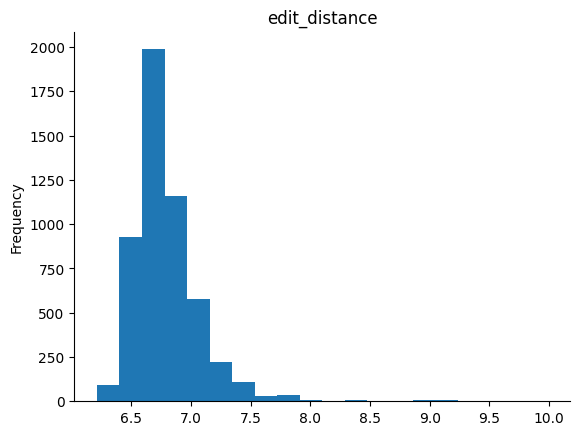

In [47]:
# check distribution
from matplotlib import pyplot as plt
df['edit_distance'].plot(kind='hist', bins=20, title='edit_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
# evaluation
edit_distance_threshold = 7
df["model_edit_distance"] = df['edit_distance'] > edit_distance_threshold
edit_distance_predicts = df["model_edit_distance"].tolist()

print_metrics(*confusion_matrix(real_labels, edit_distance_predicts))

total: 5171
tp: 546, fp: 340, fn: 953, tn: 3332
precision: 0.6162528216704289, recall: 0.3642428285523682, f1: 0.45786163522012574


#### c-4. NLTK
1. Case
2. Lemmatization
3. Stemming

##### Tokenization

In [49]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/devrok/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
from nltk.tokenize import word_tokenize
df["nltk_tokens"] = df["text"].progress_apply(lambda txts: word_tokenize(txts)) # 파이썬에 있는 torken module 이용

def str_lower(ts: List[str]):
  l = []
  for t in ts:
    l.append(t.lower())
  return l

df["nltk_lower_tokens"] = df["nltk_tokens"].progress_apply(lambda txts: str_lower(txts))
df["nltk_words"] = df["nltk_lower_tokens"].progress_apply(lambda txts: regularize_tokens(txts)) # token를 정규화
df

Measuring edit distance: 100%|██████████| 5171/5171 [00:01<00:00, 4035.96it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject:, nron, methanol, meter, follow, th, ...",6.818311,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, nron, methanol, meter, follow, th, g..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject:, hpl, nom, january, attached, fil, h...",6.775000,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, attached, fil, hp..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject:, neon, retreat, ho, ho, ho, around, ...",6.692322,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject:, photoshop, windows, offic, cheap, m...",7.801136,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, offic, cheap, ma..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject:, indian, springs, deal, book, th, te...",6.767004,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, th, tec..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject:, put, th, th, ft, th, transport, vol...",6.779789,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, th, th, ft, th, transport, volu..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject:, following, noms, hpl, tak, th, xtra...",6.668791,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, tak, th, xtra,..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject:, calpin, daily, gas, nomination, jul...",6.828676,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpin, daily, gas, nomination, juli..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject:, industrial, worksheets, august, act...",7.225840,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti..."


##### Lemmatization
Examples of lemmatization:

-> rocks : rock

-> corpora : corpus

-> better : good

### Method1: Rule based
Word: “walked”

Rule Application: Remove “-ed”

Result: “walk

### Method2: Dictionary based

‘running’ -> ‘run’

‘better’ -> ‘good’

‘went’ -> ‘go’

### Method3: ML based (NLTK)


In [51]:
# example
# Reference: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
from nltk.stem import WordNetLemmatizer # 표제어 추출 module

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus
daaaam : dump
daaaam : child


In [52]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [53]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/devrok/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
# logic
from fast_edit_distance import edit_distance as f_edit_distance
from tqdm import tqdm
tqdm.pandas(desc="Lemmatizing...")


def lemmatize(ws: List[str]):
  return [lemmatizer.lemmatize(w) for w in ws]
  #l = []
  #for w in ws:
  #  pos_tag = nltk.pos_tag([w])[0][1]
  #  l.append(lemmatizer.lemmatize(w, pos=pos_tag.lower()))
  #return l

df["lemma"] = df["nltk_words"].progress_apply(lambda txts: lemmatize(txts))


df.loc[:, ["nltk_words", "lemma"]]

Lemmatizing...: 100%|██████████| 5171/5171 [00:01<00:00, 3521.19it/s]


,nltk_words,lemma
0,"[subject, nron, methanol, meter, follow, th, g...","[subject, nron, methanol, meter, follow, th, g..."
1,"[subject, hpl, nom, january, attached, fil, hp...","[subject, hpl, nom, january, attached, fil, hp..."
2,"[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,"[subject, photoshop, windows, offic, cheap, ma...","[subject, photoshop, window, offic, cheap, mai..."
4,"[subject, indian, springs, deal, book, th, tec...","[subject, indian, spring, deal, book, th, teco..."
...,...,...
5166,"[subject, put, th, th, ft, th, transport, volu...","[subject, put, th, th, ft, th, transport, volu..."
5167,"[subject, following, noms, hpl, tak, th, xtra,...","[subject, following, noms, hpl, tak, th, xtra,..."
5168,"[subject, calpin, daily, gas, nomination, juli...","[subject, calpin, daily, gas, nomination, juli..."
5169,"[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ..."


##### Stemming


In [60]:
# example
# Reference: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
# import these modules
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [61]:
# logic
from tqdm import tqdm
tqdm.pandas(desc="Stemming...")


def stemming(ws: List[str]):
  return [
      ps.stem(w)
      for w in ws
  ]

df["stems"] = df["lemma"].progress_apply(lambda txts: stemming(txts))
df.loc[:, ["nltk_words", "lemma", "stems"]]
#[subject, neon, retreat, ho, ho, ho, around, -> ho : stemming이 안되는 곳

Stemming...: 100%|██████████| 5171/5171 [00:06<00:00, 772.15it/s]


,nltk_words,lemma,stems
0,"[subject, nron, methanol, meter, follow, th, g...","[subject, nron, methanol, meter, follow, th, g...","[subject, nron, methanol, meter, follow, th, g..."
1,"[subject, hpl, nom, january, attached, fil, hp...","[subject, hpl, nom, january, attached, fil, hp...","[subject, hpl, nom, januari, attach, fil, hpln..."
2,"[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,"[subject, photoshop, windows, offic, cheap, ma...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, offic, cheap, mai..."
4,"[subject, indian, springs, deal, book, th, tec...","[subject, indian, spring, deal, book, th, teco...","[subject, indian, spring, deal, book, th, teco..."
...,...,...,...
5166,"[subject, put, th, th, ft, th, transport, volu...","[subject, put, th, th, ft, th, transport, volu...","[subject, put, th, th, ft, th, transport, volu..."
5167,"[subject, following, noms, hpl, tak, th, xtra,...","[subject, following, noms, hpl, tak, th, xtra,...","[subject, follow, nom, hpl, tak, th, xtra, mmc..."
5168,"[subject, calpin, daily, gas, nomination, juli...","[subject, calpin, daily, gas, nomination, juli...","[subject, calpin, daili, ga, nomin, juli, ment..."
5169,"[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ...","[subject, industri, worksheet, august, activ, ..."


##### Lemmatize and Stem the keywords!

In [62]:
lemmatized_keywords = lemmatize(keywords)
stemmed_keywords = stemming(lemmatized_keywords)
clean_keywords = list(set(stemmed_keywords))
print(keywords[:10])
print(clean_keywords[:10])

['click', '$$$', 'lifetime', 'rates', 'sales', 'clearance', 'certified', 'obligation', 'consultation', 'sample']
['solut', 'subscrib', 'click', '$$$', 'afford', 'marketing solut', 'bonu', 'no questions ask', 'guarante', 'expir']


#### c-5. apply NLTK to method c-2, c-3

##### Regex

In [63]:
def clean_keyword_regex(text):
  # copy your logic on section c-2.
  # use clean_keywords instead of keywords
  for keyword in clean_keywords:
    for t in text:
      if re.search(f"{keyword}\D+", t, re.IGNORECASE):
        return 1
  return 0

df["model_clean_regex"] = df["stems"].progress_apply(lambda txt: clean_keyword_regex(txt))
df

Stemming...: 100%|██████████| 5171/5171 [00:17<00:00, 288.77it/s]


,Unnamed: 0,label,text,label_num,model_without_nlp,model_rule_based,model_regex,words,edit_distance,model_edit_distance,nltk_tokens,nltk_lower_tokens,nltk_words,lemma,stems,model_clean_regex
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,1,1,"[subject:, nron, methanol, meter, follow, th, ...",6.818311,False,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, nron, methanol, meter, follow, th, g...","[subject, nron, methanol, meter, follow, th, g...","[subject, nron, methanol, meter, follow, th, g...",1
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,0,0,"[subject:, hpl, nom, january, attached, fil, h...",6.775000,False,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, hpl, nom, january, attached, fil, hp...","[subject, hpl, nom, january, attached, fil, hp...","[subject, hpl, nom, januari, attach, fil, hpln...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,1,1,1,"[subject:, neon, retreat, ho, ho, ho, around, ...",6.692322,False,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0,1,1,"[subject:, photoshop, windows, offic, cheap, m...",7.801136,True,"[Subject, :, photoshop, ,, windows, ,, office,...","[subject, :, photoshop, ,, windows, ,, office,...","[subject, photoshop, windows, offic, cheap, ma...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, offic, cheap, mai...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,1,1,"[subject:, indian, springs, deal, book, th, te...",6.767004,False,"[Subject, :, re, :, indian, springs, this, dea...","[subject, :, re, :, indian, springs, this, dea...","[subject, indian, springs, deal, book, th, tec...","[subject, indian, spring, deal, book, th, teco...","[subject, indian, spring, deal, book, th, teco...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,1,1,"[subject:, put, th, th, ft, th, transport, vol...",6.779789,False,"[Subject, :, put, the, 10, on, the, ft, the, t...","[subject, :, put, the, 10, on, the, ft, the, t...","[subject, put, th, th, ft, th, transport, volu...","[subject, put, th, th, ft, th, transport, volu...","[subject, put, th, th, ft, th, transport, volu...",0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1,1,1,"[subject:, following, noms, hpl, tak, th, xtra...",6.668791,False,"[Subject, :, 3, /, 4, /, 2000, and, following,...","[subject, :, 3, /, 4, /, 2000, and, following,...","[subject, following, noms, hpl, tak, th, xtra,...","[subject, following, noms, hpl, tak, th, xtra,...","[subject, follow, nom, hpl, tak, th, xtra, mmc...",0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,0,0,"[subject:, calpin, daily, gas, nomination, jul...",6.828676,False,"[Subject, :, calpine, daily, gas, nomination, ...","[subject, :, calpine, daily, gas, nomination, ...","[subject, calpin, daily, gas, nomination, juli...","[subject, calpin, daily, gas, nomination, juli...","[subject, calpin, daili, ga, nomin, juli, ment...",0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,1,1,"[subject:, industrial, worksheets, august, act...",7.225840,True,"[Subject, :, industrial, worksheets, for, augu...","[subject, :, industrial, worksheets, for, augu...","[subject, industrial, worksheets, august, acti...","[subject, industrial, worksheet, august, activ...","[subject, industri, worksheet, august, activ, ...",1


In [64]:
# previous
# precision: 0.3321051338737411, recall: 0.9019346230820547, f1: 0.4854578096947935
clean_regex_predicts = df["model_clean_regex"].tolist()

print_metrics(*confusion_matrix(real_labels, clean_regex_predicts))

total: 5171
tp: 787, fp: 1344, fn: 712, tn: 2328
precision: 0.3693101830126701, recall: 0.5250166777851901, f1: 0.4336088154269972


##### Edit distance

In [65]:
from tqdm import tqdm
tqdm.pandas(desc="Measuring edit distance")


def clean_edit_distance_per_keyword(ws: List[str]):
  # copy your logic on section c-3.
  # use clean_keywords instead of keywords
  distance = 0
  for keyword in keywords:
    for w in ws:
      distance += f_edit_distance(keyword, w)
  return distance / (len(keywords) * len(ws))

df["clean_edit_distance"] = df["stems"].progress_apply(lambda txts: clean_edit_distance_per_keyword(txts))
df.loc[:, ["stems", "clean_edit_distance"]]

Measuring edit distance: 100%|██████████| 5171/5171 [00:16<00:00, 309.43it/s]


,stems,clean_edit_distance
0,"[subject, nron, methanol, meter, follow, th, g...",6.585389
1,"[subject, hpl, nom, januari, attach, fil, hpln...",6.661765
2,"[subject, neon, retreat, ho, ho, ho, around, w...",6.503014
3,"[subject, photoshop, window, offic, cheap, mai...",7.185829
4,"[subject, indian, spring, deal, book, th, teco...",6.524816
...,...,...
5166,"[subject, put, th, th, ft, th, transport, volu...",6.682127
5167,"[subject, follow, nom, hpl, tak, th, xtra, mmc...",6.536601
5168,"[subject, calpin, daili, ga, nomin, juli, ment...",6.527206
5169,"[subject, industri, worksheet, august, activ, ...",6.805212


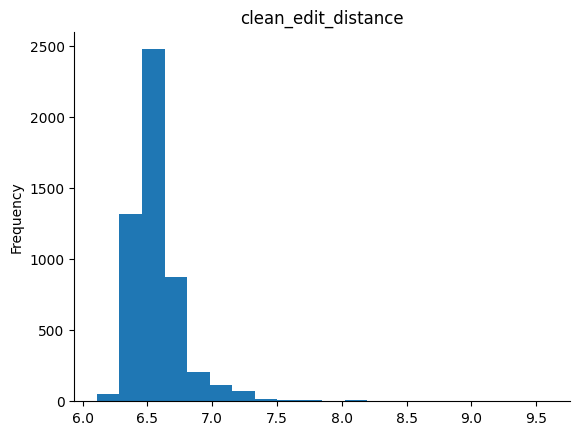

In [66]:
from matplotlib import pyplot as plt
df['clean_edit_distance'].plot(kind='hist', bins=20, title='clean_edit_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
# previous
# precision: 0.5656108597285068, recall: 0.41694462975316876, f1: 0.4800307219662059

edit_distance_threshold = 6
df["model_clean_edit_distance"] = df['clean_edit_distance'] > edit_distance_threshold
clean_edit_distance_predicts = df["model_clean_edit_distance"].tolist()

print_metrics(*confusion_matrix(real_labels, clean_edit_distance_predicts))

total: 5171
tp: 1499, fp: 3672, fn: 0, tn: 0
precision: 0.2898859021465867, recall: 1.0, f1: 0.4494752623688156


[4, 3, 1 ...] -> 각 단어간의 등장횟수 vector -> 특정벡터는 label 1로 판단

## Implement with scikit-learn!

* In this section we are going to use **counter vectorizer** to build a classifier.


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_au

In [69]:
# as we are trying to use regression, which requires training, we will split the dataset into train and test.

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df["text"],df["label_num"], test_size=0.2, random_state=10)

In [70]:
len(df)*0.8

4136.8

In [71]:
train_X

4164    Subject: enron / hpl actuals for sept . 11 , 2...
113     Subject: mitchell gas services 2 / 00\r\n- - -...
2697    Subject: jan . 01 sale to texas general land o...
737     Subject: fw : crosstex energy , driscoll ranch...
4214    Subject: no more anxiety ! valium % xanax are ...
                              ...                        
1180    Subject: re : may activity survey\r\nthanks , ...
3441    Subject: hi paliourg all available meds . avai...
1344    Subject: abazis @ iit . demokritos . gr : new ...
4623    Subject: re : flow volumes at oxy gladewater ,...
1289    Subject: calpine daily gas nomination\r\n>\r\n...
Name: text, Length: 4136, dtype: object

In [72]:
train_y # spam, non spam label

4164    0
113     0
2697    0
737     0
4214    1
       ..
1180    0
3441    1
1344    1
4623    0
1289    0
Name: label_num, Length: 4136, dtype: int64

In [73]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True) # stop_words : 불용어 제거 언어 선택, lowercase : 대소문자 구분 없이

In [74]:
vectorizer.fit(["fsdf 213423 sdfsdf 243 f24fsf245"])
print(vectorizer.get_feature_names_out())

['213423' '243' 'f24fsf245' 'fsdf' 'sdfsdf']


In [75]:
# build vocabulary with training data and see what's in it.
vectorizer.fit(train_X)
print(vectorizer.get_feature_names_out()[0:20]) # get_feature_names_out()를 사용하면 CountVectorizer가 텍스트 데이터에서 추출한 고유 단어들의 목록 추출
print(vectorizer.get_feature_names_out()[-20:])

['00' '000' '0000' '000000' '000000000002858' '000080' '0001' '00018'
 '00020608' '0004' '0005' '0008' '001' '0010' '0012' '002' '0022' '00221'
 '0025' '0027']
['zxgwvpiadobe' 'zxgwvpihere' 'zxgwvpiimg' 'zxgwvpimacromedia'
 'zxgwvpimicrosoft' 'zxgwvpinorton' 'zxjcxz' 'zxklh' 'zxzmcnbf' 'zyban'
 'zykfe' 'zyl' 'zynve' 'zyrtec' 'zyyqywp' 'zzn' 'zzo' 'zzocb' 'zzso'
 'zzsyt']


In [76]:
len(vectorizer.get_feature_names_out())

44268

In [77]:
# vecotrize both train and test with the fit vectorizer
train_X_vector = vectorizer.transform(train_X)
test_X_vector = vectorizer.transform(test_X)

In [78]:
print(train_X)

4164    Subject: enron / hpl actuals for sept . 11 , 2...
113     Subject: mitchell gas services 2 / 00\r\n- - -...
2697    Subject: jan . 01 sale to texas general land o...
737     Subject: fw : crosstex energy , driscoll ranch...
4214    Subject: no more anxiety ! valium % xanax are ...
                              ...                        
1180    Subject: re : may activity survey\r\nthanks , ...
3441    Subject: hi paliourg all available meds . avai...
1344    Subject: abazis @ iit . demokritos . gr : new ...
4623    Subject: re : flow volumes at oxy gladewater ,...
1289    Subject: calpine daily gas nomination\r\n>\r\n...
Name: text, Length: 4136, dtype: object


In [79]:
print(train_X[4164])
print(len(train_X[0]))

Subject: enron / hpl actuals for sept . 11 , 2000
teco tap 25 . 000 / enron ; 125 . 000 / hpl gas daily
ls hpl lsk ic 15 . 000 / enron
327


In [80]:
# 예시
from sklearn.feature_extraction.text import CountVectorizer

# 예시 데이터
ex_x = ["This is a new document.", "This is the first document.", "This document is the second document.", "And this is the third one.", "Is this the first document?", "This is a new document."]

# CountVectorizer 객체 생성 및 학습
exvectorizer = CountVectorizer(stop_words='english', lowercase=True)
exvectorizer.fit(ex_x)

# 훈련 데이터 벡터화
ex_x_vector = exvectorizer.transform(ex_x)
print(exvectorizer.get_feature_names_out())
print(ex_x_vector) # 단어 등장횟수를 벡터로
print(ex_x_vector.toarray()) # row : 문장, col : courup

['document' 'new' 'second']
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (6, 3)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (2, 0)	2
  (2, 2)	1
  (4, 0)	1
  (5, 0)	1
  (5, 1)	1
[[1 1 0]
 [1 0 0]
 [2 0 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]]


In [81]:
print(train_X_vector[0])
print(train_X_vector[0].toarray().tolist()[0][:10])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 18 stored elements and shape (1, 44268)>
  Coords	Values
  (0, 1)	3
  (0, 341)	1
  (0, 438)	1
  (0, 689)	1
  (0, 967)	1
  (0, 1222)	1
  (0, 4523)	1
  (0, 13473)	1
  (0, 16671)	3
  (0, 19293)	1
  (0, 21717)	3
  (0, 22059)	1
  (0, 26206)	1
  (0, 26214)	1
  (0, 36336)	1
  (0, 38409)	1
  (0, 39106)	1
  (0, 39271)	1
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0]


In [82]:
vectorizer.inverse_transform([[1, 30]])

[array(['00', '000'], dtype='<U24')]

In [83]:
# we are going to use simple model.
# regression model draws a line based on the number of words being mentioned in the mail.

# build a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X_vector, train_y)

LogisticRegression()

In [84]:
y_pred_train = model.predict(train_X_vector)
y_pred_test = model.predict(test_X_vector)

y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

# training dataset score
print(classification_report(y_pred_train, train_y))
print(confusion_matrix(y_pred_train, train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00      1205

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136

[[2930    1]
 [   1 1204]]


In [86]:
# test dataset score
print(classification_report(y_pred_test, test_y))
print(confusion_matrix(y_pred_test, test_y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       730
           1       0.99      0.95      0.97       305

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035

[[726   4]
 [ 15 290]]
